La integral con 3 puntos de evaluación es 6.481130171427754


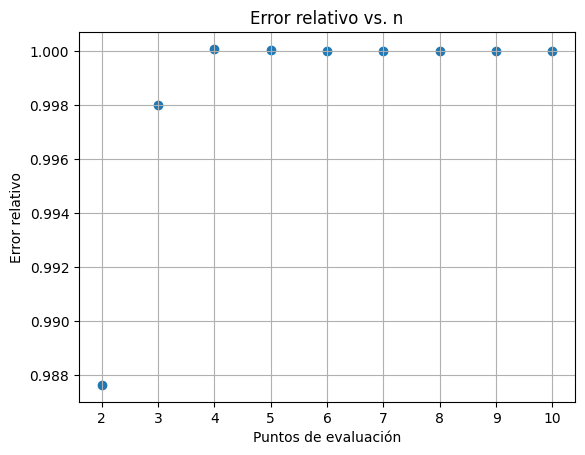

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
sym.init_printing(use_unicode=True)
import math
import threading
import sys

#Cuadratura Gauss_Laguerre (de 0 a infinito)
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

def GetNewton(f,df,xn,itmax=100000,precision=1e-13):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots


def GetLaguerreRecursive(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1 - x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerreRecursive(n-1,x)-(n-1)*GetLaguerreRecursive(n-2,x))/n
   
    return sym.expand(poly,x)

def GetDLaguerre(n,x):
    Pn = GetLaguerreRecursive(n,x)
    return sym.diff(Pn,x,1)

def GetAllRootsGLag(n):

    #xn = np.linspace(0,n + (n-1)*math.sqrt(n), 100)
    xn = np.linspace(0,2*n + (n-1)*math.sqrt(n), 1000)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerreRecursive(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots


def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerreRecursive(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/((n+1)**2*(poly(Roots))**2)
    
    return Weights

n = 3
raices = GetAllRootsGLag(n)
pesos = GetWeightsGLag(n)
funcion = lambda x: (x**3/(np.e**x - 1))/np.e**(-x) #Esta la cambias por la función que quieras 

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])

print(f"La integral con 3 puntos de evaluación es {I}")

I_exacto = (np.pi)**4/15


error_lista = []
n_lista = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_lista:
    raices = GetAllRootsGLag(n)
    pesos = GetWeightsGLag(n)
    I = 0
    for i in range(n):
        I += pesos[i]*funcion(raices[i])
    error = (I)/I_exacto
    error_lista.append(error)

plt.scatter(n_lista, error_lista)
plt.ylabel("Error relativo")
plt.xlabel("Puntos de evaluación")
plt.title("Error relativo vs. n")
plt.grid()
plt.show()